In [1]:
import sys, os
# Uncomment the line below if you want to run on CPU
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import pandas as pd
#from train_models import train_pgbm_dengue, apply_dengue_pgbm_on_chik, train_pgbm_chik
from train_models import train_dl_model, train_transf_chik
from train_models import LOOK_BACK, PREDICT_N
from train_models import train_pgbm_model, apply_dengue_pgbm_on_chik
sys.path.append('../')
from lstm import apply_model
from pgbm_model import pgbm_pred

2023-11-24 20:28:39.246442: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 20:28:39.265726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 20:28:39.265749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 20:28:39.266404: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-24 20:28:39.270511: I tensorflow/core/platform/cpu_feature_guar

In [2]:
df = pd.read_csv('selected_cities.csv', index_col = 'Unnamed: 0')
df.head()

,geocode,state,sum_cases,POP22,inc,n_last_ep,year_first_ep,year_last_ep_before_2023,region,region_codes,start_train_chik,end_train_chik
0,2211001,PI,2325,868523,267.695847,4,2015,2022,ne,1,2014-10-01,2022-11-01
1,2913606,BA,1858,197163,942.367483,2,2015,2016,ne,1,2014-10-01,2016-11-01
2,2914802,BA,1846,185500,995.148248,2,2016,2022,ne,1,2015-10-01,2022-11-01
3,2111300,MA,1788,1061374,168.460882,2,2016,2022,ne,1,2015-10-01,2022-11-01
4,2925303,BA,1687,158736,1062.770890,2,2016,2017,ne,1,2015-10-01,2017-11-01


In [3]:

city = 2802106
df = df.loc[df.geocode == city]
state = df.state
INI_DATE = df.start_train_chik.values[0]
END_DATE_TRAIN = df.end_train_chik.values[0]
END_DATE = '2023-11-01'

In [4]:
print('INI_DATE:', INI_DATE)
print('END_DATE_TRAIN:', END_DATE_TRAIN)

INI_DATE: 2014-10-01
END_DATE_TRAIN: 2021-11-01


### Train the dengue DL model:

2023-11-24 20:28:45.491418: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 20:28:45.491570: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 20:28:45.491686: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Compilation Time :  0.0034246444702148438
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52, 240)]         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 32)            69888     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 52, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                   

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

Epoch 1/250


2023-11-24 20:28:48.408142: I external/local_xla/xla/service/service.cc:168] XLA service 0x2c575360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-24 20:28:48.408161: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-11-24 20:28:49.309811: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1700868529.339593   90901 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2023-11-24 20:28:49.643110: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


421/421 [==============================] - 6s 6ms/step - loss: 0.0617 - accuracy: 0.2898 - mape: 15647908.0000 - mse: 0.0269 - val_loss: 0.0536 - val_accuracy: 0.2837 - val_mape: 19155212.0000 - val_mse: 0.0229
Epoch 2/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.2304 - mape: 17058450.0000 - mse: 0.0250 - val_loss: 0.0424 - val_accuracy: 0.2340 - val_mape: 10801364.0000 - val_mse: 0.0191
Epoch 3/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0388 - accuracy: 0.2708 - mape: 8300751.5000 - mse: 0.0179 - val_loss: 0.0358 - val_accuracy: 0.2553 - val_mape: 6145894.5000 - val_mse: 0.0151
Epoch 4/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0337 - accuracy: 0.2993 - mape: 5777683.5000 - mse: 0.0145 - val_loss: 0.0319 - val_accuracy: 0.3050 - val_mape: 1809397.7500 - val_mse: 0.0131
Epoch 5/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0315 - accuracy: 0.2399 - mape: 6585490.0000 - 

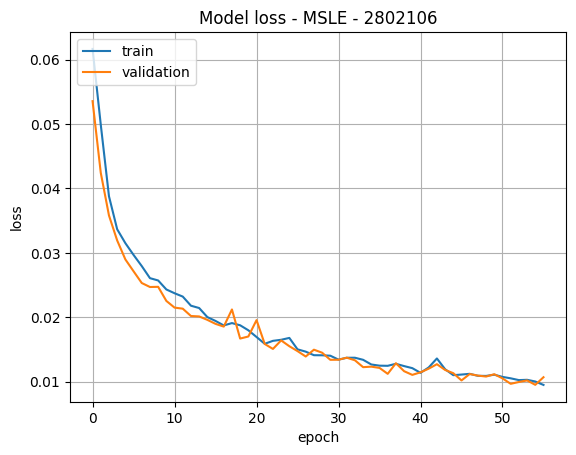

CPU times: user 4min 1s, sys: 7.18 s, total: 4min 8s
Wall time: 3min 43s


In [5]:
%%time 
train_dl_model(city,   doenca = 'dengue', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    

### Function to apply dengue model on dengue data: 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

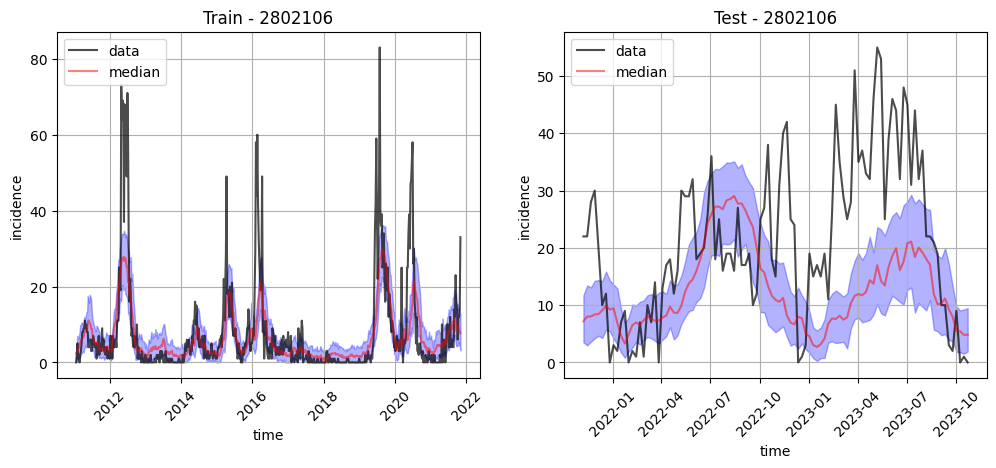

CPU times: user 2min 4s, sys: 3.57 s, total: 2min 8s
Wall time: 2min 5s


In [6]:
%%time 
# apply NN model 
metrics = apply_model(city, ini_date = None, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/dengue_{city}_cluster.csv')
    

### Apply this dengue DL model on chik data: 

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

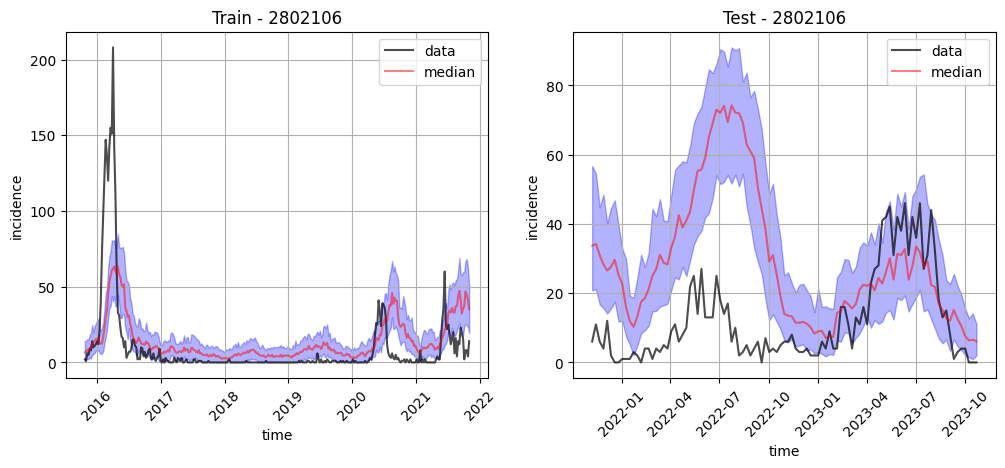

CPU times: user 1min 19s, sys: 2.32 s, total: 1min 22s
Wall time: 1min 20s


In [7]:
%%time 

# apply NN model 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_dengue_pred',
                    model_name = f'trained_{city}_dengue_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

## Apply the transfer: 

In [12]:
%%time 

train_transf_chik(city, ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)

ValueError: Layer model_3 weight shape (240, 128) is not compatible with provided weight shape (240, 256).

Apply the transfer model:

In [11]:
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_transf_pred',
                    model_name = f'trained_{city}_chik_transf_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

OSError: No file or directory found at ..//saved_models/lstm/trained_2802106_chik_transf_msle.keras

### Train the chik DL model:

Compilation Time :  0.002624988555908203
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 52, 240)]         0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 52, 32)            69888     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 52, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 52, 32)            8320      
                                                                 
 dropout_2 (Dropout)         (None, 52, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                  

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

421/421 [==============================] - 5s 6ms/step - loss: 0.0473 - accuracy: 0.2185 - mape: 5280586.0000 - mse: 0.0106 - val_loss: 0.0377 - val_accuracy: 0.1418 - val_mape: 5518038.5000 - val_mse: 0.0101
Epoch 2/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0317 - accuracy: 0.1211 - mape: 6964150.0000 - mse: 0.0105 - val_loss: 0.0257 - val_accuracy: 0.1135 - val_mape: 7547920.0000 - val_mse: 0.0098
Epoch 3/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0226 - accuracy: 0.1069 - mape: 9633832.0000 - mse: 0.0102 - val_loss: 0.0193 - val_accuracy: 0.1915 - val_mape: 3676163.0000 - val_mse: 0.0095
Epoch 4/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0179 - accuracy: 0.2565 - mape: 7363237.5000 - mse: 0.0097 - val_loss: 0.0160 - val_accuracy: 0.4184 - val_mape: 3306280.0000 - val_mse: 0.0090
Epoch 5/250
421/421 [==============================] - 2s 4ms/step - loss: 0.0154 - accuracy: 0.3919 - mape: 5526311.0000 - mse:

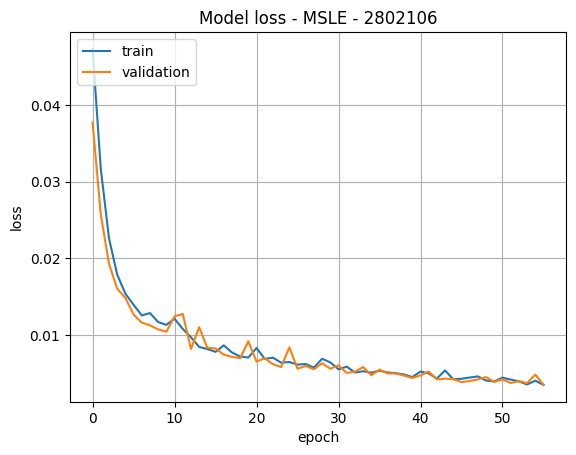

CPU times: user 3min 52s, sys: 6 s, total: 3min 58s
Wall time: 3min 23s


In [10]:
%%time 

train_dl_model(city,   doenca = 'chik', end_date_train = END_DATE_TRAIN , end_date = END_DATE)
    
    

### Apply the DL chik model on chik data

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:173: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  factor = max_features[target_col]
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/preprocessing.py:179: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of ca

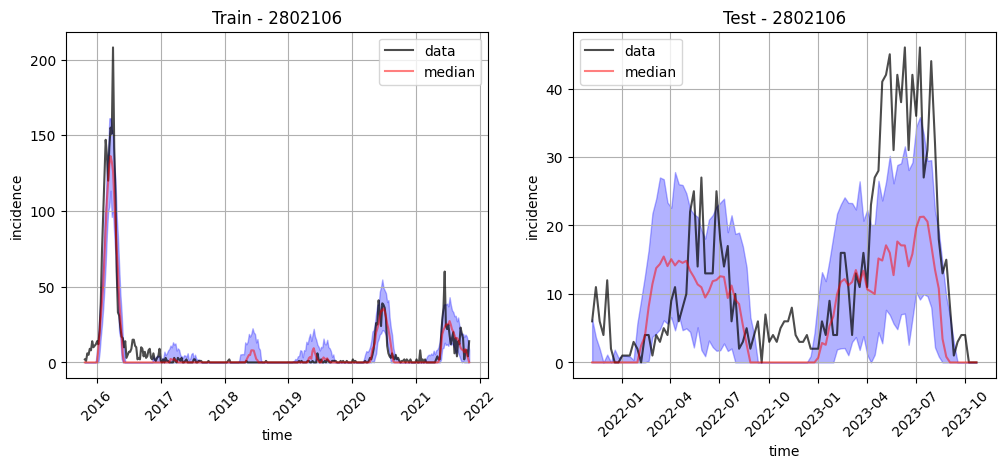

CPU times: user 1min 21s, sys: 2.33 s, total: 1min 23s
Wall time: 1min 16s


In [8]:
%%time 
metrics = apply_model(city, ini_date = INI_DATE, 
                    end_date = END_DATE, look_back = LOOK_BACK, end_train_date =  END_DATE_TRAIN, batch_size = 1, 
                    predict_n = PREDICT_N,  ratio = None,
                    label_pred= 'chik_pred',
                    model_name = f'trained_{city}_chik_msle', 
                    filename = f'../data/chik_{city}_cluster.csv', plot = True)

### Train the dengue pgbm model 

In [8]:
%%time
train_pgbm_model(city, 'dengue', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



CPU times: user 8min 18s, sys: 5min 4s, total: 13min 23s
Wall time: 1min 46s


### Apply the dengue pgbm on dengue data

In [9]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'dengue', ratio = 0.75, ini_date = None, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/dengue_{city}_cluster.csv', plot = True)

NotFittedError: This HistGradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Apply the dengue pgbm model on chik:

/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/fccoelho/Documentos/Projects_Software/transfer-learning-forecast/.venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with

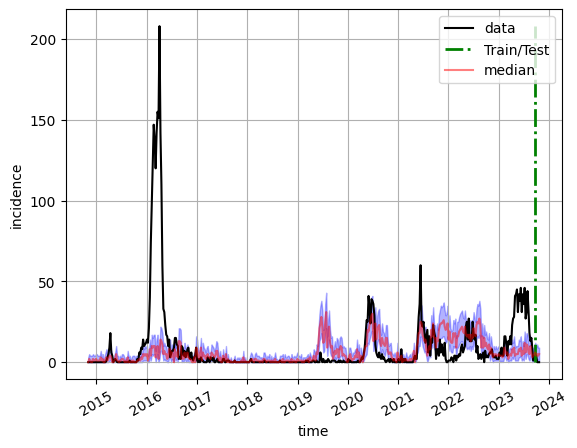

In [10]:
apply_dengue_pgbm_on_chik(city, ini_date= INI_DATE, end_date = END_DATE)

### Train the chik PGBM model:

In [ ]:
%%time
train_pgbm_model(city, 'chik', ini_date = INI_DATE, end_date_train = END_DATE_TRAIN , end_date = END_DATE)



In [ ]:
%%time
pgbm_pred(city, PREDICT_N, LOOK_BACK, doenca = 'chik', ratio = 0.75, ini_date = INI_DATE, 
                  end_train_date = END_DATE_TRAIN, end_date = END_DATE,
                  filename =  f'../data/chik_{city}_cluster.csv')